In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from modules.file import CPandasFile
import pandas as pd

In [3]:
data = CPandasFile().readCsv(r'./data/electric_production.csv', index_col=0)

data

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640


In [4]:
data.index = pd.to_datetime(data.index)

data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='DATE', length=956, freq=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 956 entries, 1939-01-01 to 2018-08-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  956 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


Đổi tên cột

In [6]:
data.columns = ['Energy_Production']

data

,Energy_Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640


Lấy dữ liệu từ nằm 1985 trở về sau để phân tích


In [7]:
data_1985 = data[data.index.year >= int(1985)]

data_1985

,Energy_Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467
...,...
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640


In [8]:
from modules.drawer import CDrawer

In [9]:
drawer = CDrawer()

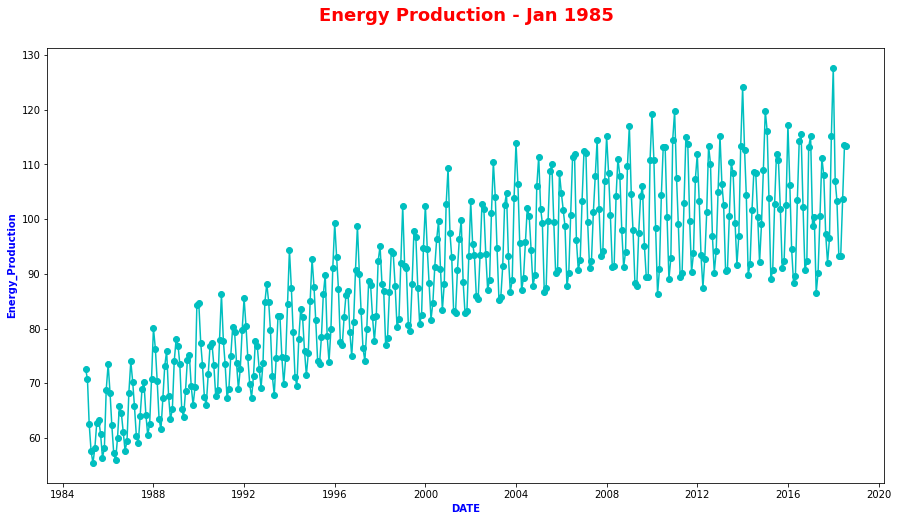

In [11]:
drawer.line(data_1985.index, data_1985["Energy_Production"], "Energy Production - Jan 1985\n", (15, 8))

In [12]:
from modules.arima import CArima

In [39]:
model = CArima(data_1985)
model.selectBestParameters()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1827.308, Time=2.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2055.116, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1980.491, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1876.298, Time=0.56 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1826.789, Time=2.05 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1826.372, Time=8.03 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1825.064, Time=9.49 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1812.125, Time=13.10 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1815.973, Time=10.05 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1810.891, Time=10.95 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1824.617, Time=10.09 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1815.075, Time=4.58 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1827.134, Time=2.09 sec
 ARIMA(0,1,2)(2,1,2)

In [32]:
import time

def measureTime(your_def: "def"):
    start = time.time()
    your_def
    end = time.time()
    print((end - start))

def run1000time():
    for i in range(10):
        tmp = i

    print('done')

In [33]:
measureTime(run1000time())

done
4.76837158203125e-07


In [40]:
train = data.loc['1985-01-01':'2015-01-01']
test = data.loc['2015-01-01':]

In [41]:
train

,Energy_Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467
...,...
2014-09-01,100.4068
2014-10-01,92.1060
2014-11-01,99.0559


In [42]:
test.head(), test.shape

(            Energy_Production
 DATE                         
 2015-01-01           119.8260
 2015-02-01           116.0253
 2015-03-01           103.9265
 2015-04-01            89.0847
 2015-05-01            90.6408,
 (44, 1))

In [43]:
model.initModel(train)

In [45]:
y_hat = model.predict(test)

In [47]:
y_hat.head()

,Prediction
DATE,
2015-01-01,109.605398
2015-02-01,100.706268
2015-03-01,89.711359
2015-04-01,92.068945
2015-05-01,103.037539


In [48]:
y_hat.shape

(44, 1)

In [49]:
import matplotlib.pyplot as plt

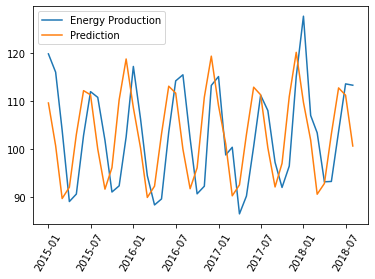

In [56]:
plt.plot(test, label='Energy Production')
plt.plot(y_hat, label="Prediction")
plt.xticks(rotation=60)
plt.legend()

plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
mae = mean_absolute_error(test, y_hat)
mae

8.801487789540117

In [59]:
mse = mean_squared_error(test, y_hat)
mse

102.43781529022881

In [60]:
import math

In [61]:
math.sqrt(102.43)

10.120770721639731

Dự đoán cho 12 tháng tiếp theo

In [62]:
future_forecast = model.model.predict(n_periods=len(test)+12)

future_forecast

array([109.60539803, 100.70626757,  89.71135893,  92.06894458,
       103.0375385 , 112.17579572, 111.3047587 , 100.01379739,
        91.66410533,  96.12871948, 110.27753766, 118.76801788,
       108.64361738, 100.2133264 ,  89.93911486,  92.28891179,
       103.14679837, 113.09871244, 111.66337031,  99.99294904,
        91.75643333,  96.10083652, 110.79629392, 119.35702508,
       109.05569182, 101.07552013,  90.27862784,  92.55439209,
       103.04898236, 112.89399685, 111.30885561, 100.28327484,
        92.1216205 ,  97.03966013, 110.92734272, 120.15301815,
       109.73004483, 101.87582517,  90.6072485 ,  92.8444685 ,
       103.16854719, 112.74569919, 111.22367258, 100.64891178,
        92.49914796,  97.76231528, 111.06692622, 120.63874672,
       110.1946615 , 102.29363944,  90.90115975,  93.13631213,
       103.46045128, 112.91838368, 111.46946274, 100.97575155])

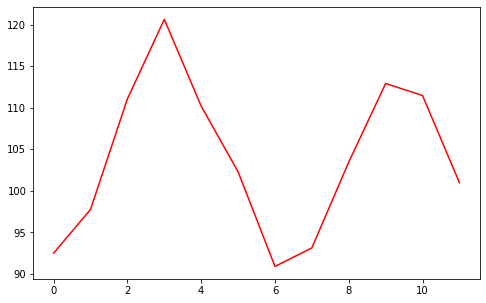

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(future_forecast[len(test):], color='red')
plt.xtic
plt.show(_)